In [ ]:
#                                                 PNEUMONIA DETECTION USING CHEST X-RAYS
#                                                 ______________________________________

In [ ]:
# DATASET HAS AROUND 1000+ IMAGES FOR PNEUMONIA CASES
# DATASET HAS AROUND 700+ IMAGES FOR NORMAL CASES

In [ ]:
# USED VGGC16 FOR THE MODEL

In [ ]:
# MODEL HERE-----
#              ||
#              ||
#              ||
#              ||
#              ||
#              ------>

In [ ]:
#importing stuff

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Flatten , Activation , Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
#loading the dataset and the values

root_dir = '/content/data'

file_paths = []
labels = []


for directory in os.listdir(root_dir):
    if directory in ['NORMAL', 'PNEUMONIA']:
        directory_path = os.path.join(root_dir, directory)

        for filename in os.listdir(directory_path):
            if filename.endswith('.jpeg'):
                file_paths.append(os.path.join(directory_path, filename))
                labels.append(directory)


dataset = pd.DataFrame({
    'path': file_paths,
    'class': labels
})

In [ ]:
dataset

,path,class
0,/content/data/NORMAL/IM-0666-0001.jpeg,NORMAL
1,/content/data/NORMAL/NORMAL2-IM-0447-0001.jpeg,NORMAL
2,/content/data/NORMAL/NORMAL2-IM-0827-0001.jpeg,NORMAL
3,/content/data/NORMAL/NORMAL2-IM-0811-0001.jpeg,NORMAL
4,/content/data/NORMAL/NORMAL2-IM-0567-0001.jpeg,NORMAL
...,...,...
1740,/content/data/PNEUMONIA/person1405_bacteria_35...,PNEUMONIA
1741,/content/data/PNEUMONIA/person1482_virus_2573....,PNEUMONIA
1742,/content/data/PNEUMONIA/person319_virus_646.jpeg,PNEUMONIA
1743,/content/data/PNEUMONIA/person1540_bacteria_40...,PNEUMONIA


In [ ]:
#doing train-test split here

from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(dataset, train_size=0.7, random_state=42)
validation_data, test_data = train_test_split(test_data, train_size= 0.7, shuffle=True, random_state=42)
validation_data.head()

,path,class
1326,/content/data/PNEUMONIA/person1517_virus_2644....,PNEUMONIA
84,/content/data/NORMAL/IM-0703-0001.jpeg,NORMAL
1554,/content/data/PNEUMONIA/person1505_virus_2615....,PNEUMONIA
711,/content/data/NORMAL/IM-0684-0001.jpeg,NORMAL
56,/content/data/NORMAL/NORMAL2-IM-0413-0001.jpeg,NORMAL


In [ ]:
# data augmentation , part of CNN


train_generator = ImageDataGenerator(
    rescale= 1./255.,
    horizontal_flip=True,
    height_shift_range=0.2,
    zoom_range=0.2
)

test_generator = ImageDataGenerator(
    rescale= 1./255.,
    horizontal_flip=True,
)

train_gen = train_generator.flow_from_dataframe(
    train_data,
    x_col='path',
    y_col='class',
    target_size=(224,224),
    batch_size=32,
    class_mode="binary",
)

valid_gen = test_generator.flow_from_dataframe(
    validation_data,
    x_col='path',
    y_col='class',
    target_size=(224,224),
    batch_size=32,
    class_mode="binary",
)


test_gen = test_generator.flow_from_dataframe(
    test_data,
    x_col='path',
    y_col='class',
    target_size=(224,224),
    batch_size=32,
    class_mode="binary",
)

Found 1221 validated image filenames belonging to 2 classes.
Found 366 validated image filenames belonging to 2 classes.
Found 158 validated image filenames belonging to 2 classes.


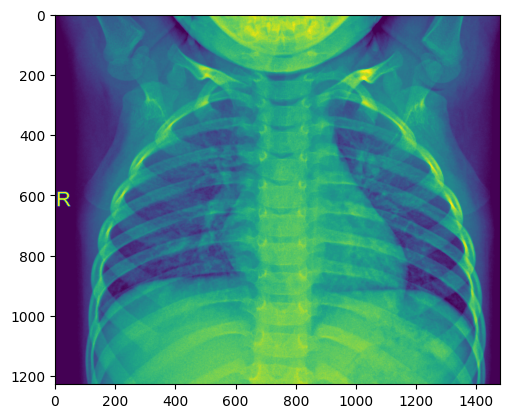

In [ ]:
#showing an image from the dataset

image = Image.open(dataset['path'][69])
plt.imshow(image)

In [ ]:
# VGGC16 model

VGGmodel= tf.keras.applications.VGG16(weights='imagenet',
    include_top = False,
    input_shape=(224,224,3),
    pooling= 'max')

In [ ]:
VGGmodel.trainable=False

In [ ]:
# continued model

model = Sequential()
model.add(VGGmodel)
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(2048, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compiling the model
model.compile(Adam(learning_rate = 0.0001) , loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 1000)              513000    
                                                                 
 dense_6 (Dense)             (None, 1024)              1025024   
                                                                 
 dense_7 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_8 (Dense)             (None, 2048)              2099200   
                                                                 
 dense_9 (Dense)             (None, 1)                

In [ ]:
# running epochs , 25 max , time taken is too long afterwards

history = model.fit(
  train_gen,
  validation_data=valid_gen,
  epochs=25,
)

Epoch 1/25
39/39 [==============================] - 48s 926ms/step - loss: 0.4323 - accuracy: 0.8092 - val_loss: 0.3057 - val_accuracy: 0.8661
Epoch 2/25
39/39 [==============================] - 32s 823ms/step - loss: 0.2255 - accuracy: 0.9107 - val_loss: 0.3159 - val_accuracy: 0.8743
Epoch 3/25
39/39 [==============================] - 33s 854ms/step - loss: 0.2039 - accuracy: 0.9296 - val_loss: 0.3511 - val_accuracy: 0.8634
Epoch 4/25
39/39 [==============================] - 32s 820ms/step - loss: 0.1735 - accuracy: 0.9419 - val_loss: 0.2806 - val_accuracy: 0.8934
Epoch 5/25
39/39 [==============================] - 33s 849ms/step - loss: 0.1658 - accuracy: 0.9517 - val_loss: 0.1833 - val_accuracy: 0.9208
Epoch 6/25
39/39 [==============================] - 33s 838ms/step - loss: 0.1518 - accuracy: 0.9476 - val_loss: 0.2130 - val_accuracy: 0.9180
Epoch 7/25
39/39 [==============================] - 32s 823ms/step - loss: 0.1584 - accuracy: 0.9517 - val_loss: 0.3668 - val_accuracy: 0.8607

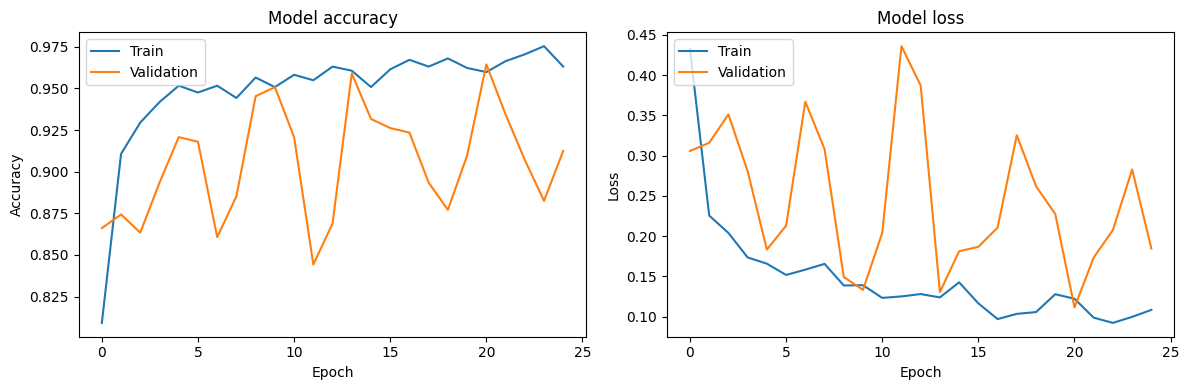

In [ ]:


# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import classification_report


test_loss, test_acc = model.evaluate(test_gen)
print('Test Accuracy:', test_acc)

predictions = model.predict(test_gen)

true_labels = test_gen.classes



#94% accuracy
#model is kind of overfitting
#use l2 regularizer to reduce overfitting
#achieve atleast 99% accuracy after

5/5 [==============================] - 9s 2s/step - loss: 0.1540 - accuracy: 0.9494
Test Accuracy: 0.949367105960846
5/5 [==============================] - 2s 387ms/step


In [ ]:
# classification report

report = classification_report(true_labels, predictions.argmax(axis=1))
print('Classification Report:')
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.43      1.00      0.60        68
           1       0.00      0.00      0.00        90

    accuracy                           0.43       158
   macro avg       0.22      0.50      0.30       158
weighted avg       0.19      0.43      0.26       158



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model.save("VGG16_MODEL.h5")

In [ ]:
#model run on different collab page